In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chisquare, pearsonr,chi2_contingency, f_oneway,tukey_hsd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
import ast

warnings.filterwarnings("ignore")


In [10]:
df_join.columns

Index(['jpbox_fr_title', 'jpbox_released_year', 'jpbox_original_title',
       'jpbox_country', 'jpbox_category', 'jpbox_released_date',
       'jpbox_classification', 'jpbox_duration', 'jpbox_total_entrances',
       'jpbox_weekly_entrances', 'jpbox_incomes_total', 'jpbox_incomes_france',
       'jpbox_budget', 'jpbox_url_movie', 'jpbox_synopsis', 'allocine_writer',
       'allocine_director', 'allocine_casting', 'allocine_press_note',
       'allocine_box_office_week2', 'allocine_societies',
       'allocine_soundtrack', 'allocine_distribution'],
      dtype='object')

In [172]:
# importer le json en df
df_join = pd.read_csv('joined_full_movies.csv')
df_join = df_join[['jpbox_fr_title', 'jpbox_released_year','jpbox_original_title','jpbox_country', 'jpbox_category',
       'jpbox_released_date', 'jpbox_classification', 'jpbox_duration',
       'jpbox_total_entrances', 'jpbox_weekly_entrances',
       'jpbox_incomes_total', 'jpbox_incomes_france', 'jpbox_budget',
       'jpbox_url_movie', 'jpbox_synopsis','allocine_writer', 'allocine_director',
       'allocine_casting', 'allocine_press_note','allocine_box_office_week2', 'allocine_societies',
       'allocine_soundtrack','allocine_distribution']]

# Mettre les dates au bon format

df_join['jpbox_released_date']=df_join['jpbox_released_date'].str.strip()
df_join['jpbox_released_date']=df_join['jpbox_released_date'].str.replace('/','-')
df_join['jpbox_released_date'] = pd.to_datetime(df_join['jpbox_released_date'], format="%d-%m-%Y",errors="coerce")

# # Conversion des durée en timedelta(Erreur avec 40 films)

df_join["jpbox_duration"] = pd.to_timedelta(df_join["jpbox_duration"], errors='coerce')
df_join["jpbox_duration_minutes"] = pd.to_timedelta(df_join["jpbox_duration"], errors='coerce').dt.total_seconds() / 60
df_join['jpbox_released_year'] = df_join['jpbox_released_year'].astype(str)

# Mise en forme des budgets
df_join['jpbox_budget'] = (
    df_join['jpbox_budget']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)  # Remplace les chaînes vides par NaN
    .astype('Int64')     # Type entier nullable de pandas
)

# Mise en forme des incomes_frances
df_join['jpbox_incomes_france'] = (
    df_join['jpbox_incomes_france']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)  # Remplace les chaînes vides par NaN
    .astype('Int64')     # Type entier nullable de pandas
)

# Mise en forme des jpbox_incomes_total
df_join['jpbox_incomes_total'] = (
    df_join['jpbox_incomes_total']
    .astype(str)
    .str.replace(r'[^\d]', '', regex=True)
    .replace('', pd.NA)  # Remplace les chaînes vides par NaN
    .astype('Int64')     # Type entier nullable de pandas
)

# Mise en forme les notes de la press

df_join.allocine_press_note = df_join.allocine_press_note.replace(',', '.', regex=True).astype(float)

# Meilleures mise en forme des listes

def safe_casting_parser(x):
    if pd.isna(x):
        return ['no information']
    try:
        return ast.literal_eval(x.replace('"', "'"))
    except:
        return ['no information']

df_join['allocine_casting'] = df_join['allocine_casting'].map(safe_casting_parser)
df_join['allocine_writer'] = df_join['allocine_writer'].map(safe_casting_parser)
df_join['allocine_societies'] = df_join['allocine_societies'].map(safe_casting_parser)
df_join['allocine_soundtrack'] = df_join['allocine_soundtrack'].map(safe_casting_parser)

# Utilisation de la mediane pour les variables continues qui n'ont pas d'infos

data_numeric = ['jpbox_budget','jpbox_incomes_total','jpbox_incomes_france','allocine_press_note','jpbox_duration_minutes']
for column in data_numeric:
    df_join[column] = df_join[column].fillna(df_join[column].min())

df_fill_string = ['jpbox_classification','jpbox_synopsis','allocine_director','allocine_distribution']

for column in df_fill_string:
    df_join[column] = df_join[column].fillna('no information')

# print(len(df))
print(df_join.columns)
df_join.dtypes
# df_join['jpbox_duration_minutes']

df_join.to_csv('data_complete.csv')

Index(['jpbox_fr_title', 'jpbox_released_year', 'jpbox_original_title',
       'jpbox_country', 'jpbox_category', 'jpbox_released_date',
       'jpbox_classification', 'jpbox_duration', 'jpbox_total_entrances',
       'jpbox_weekly_entrances', 'jpbox_incomes_total', 'jpbox_incomes_france',
       'jpbox_budget', 'jpbox_url_movie', 'jpbox_synopsis', 'allocine_writer',
       'allocine_director', 'allocine_casting', 'allocine_press_note',
       'allocine_box_office_week2', 'allocine_societies',
       'allocine_soundtrack', 'allocine_distribution',
       'jpbox_duration_minutes'],
      dtype='object')


In [173]:
df_join.isna().sum()

jpbox_fr_title                  0
jpbox_released_year             0
jpbox_original_title            0
jpbox_country                   0
jpbox_category                  0
jpbox_released_date             0
jpbox_classification            0
jpbox_duration                 35
jpbox_total_entrances           0
jpbox_weekly_entrances          0
jpbox_incomes_total             0
jpbox_incomes_france            0
jpbox_budget                    0
jpbox_url_movie                 0
jpbox_synopsis                  0
allocine_writer                 0
allocine_director               0
allocine_casting                0
allocine_press_note             0
allocine_box_office_week2    2955
allocine_societies              0
allocine_soundtrack             0
allocine_distribution           0
jpbox_duration_minutes          0
dtype: int64

In [105]:
df_join.allocine_press_note

0       2.9
1       2.2
2       4.3
3       3.4
4       3.5
       ... 
7845    3.6
7846    3.0
7847    3.5
7848    3.4
7849    3.3
Name: allocine_press_note, Length: 7850, dtype: float64

In [80]:
df_join[['allocine_writer','allocine_director','allocine_casting','allocine_societies','allocine_distribution']]


,allocine_writer,allocine_director,allocine_casting,allocine_societies,allocine_distribution
0,"[Dany Boon, Sarah Kaminsky]",Dany Boon,"[Dany Boon, Laurence Arné, François Berléand]",[no information],Pathé Films
1,[Dany Boon],Dany Boon,"[Benoît Poelvoorde, Dany Boon, Julie Bernard]",[no information],Pathé Films
2,[James Cameron],James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[The Walt Disney Company France, Lightstorm En...",The Walt Disney Company France
3,"[Christopher Markus, Stephen McFeely]",Joe Russo,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...","[The Walt Disney Company France, Marvel Studios]",The Walt Disney Company France
4,"[Ted Elliott, Terry Rossio]",Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Buena Vista International, Buena Vista Pictur...",Buena Vista International
...,...,...,...,...,...
7845,[Chris Morgan],James Wan,"[Vin Diesel, Paul Walker, Jason Statham]","[Fast 7 Productions, Original Film Feature Fil...",Universal Pictures International France
7846,"[John Logan, Neal Purvis]",Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Danjaq productions, Sony Pictures Releasing F...",Sony Pictures Releasing France
7847,"[Greta Gerwig, Noah Baumbach]",Greta Gerwig,"[Margot Robbie, Ryan Gosling, America Ferrera]","[Mattel Films, Parkes / MacDonald Productions,...",Warner Bros. France
7848,[James Gunn],James Gunn,"[Chris Pratt, Zoe Saldana, Dave Bautista]","[The Walt Disney Company France, Marvel Studios]",The Walt Disney Company France


7850
                        jpbox_duration_minutes  jpbox_total_entrances  \
jpbox_duration_minutes                1.000000               0.194823   
jpbox_total_entrances                 0.194823               1.000000   
jpbox_budget                          0.319729               0.509425   
jpbox_incomes_total                   0.270241               0.667564   
jpbox_incomes_france                  0.177674               0.891928   
jpbox_weekly_entrances                0.231360               0.896700   
allocine_press_note                   0.127980               0.070403   

                        jpbox_budget  jpbox_incomes_total  \
jpbox_duration_minutes      0.319729             0.270241   
jpbox_total_entrances       0.509425             0.667564   
jpbox_budget                1.000000             0.784969   
jpbox_incomes_total         0.784969             1.000000   
jpbox_incomes_france        0.540310             0.699636   
jpbox_weekly_entrances      0.614715        

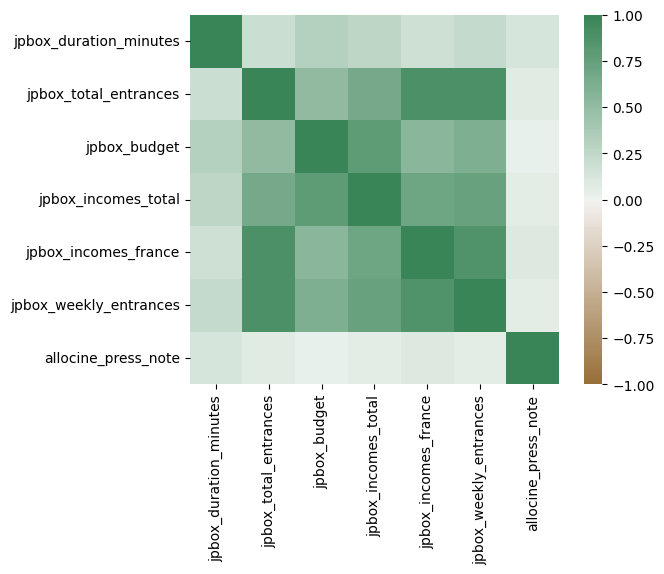

In [126]:
# df pour la heatmap
df_pearson = df_join.copy()
df_pearson = df_pearson[['jpbox_duration_minutes', 'jpbox_total_entrances','jpbox_budget','jpbox_incomes_total','jpbox_incomes_france', 'jpbox_weekly_entrances','allocine_press_note']]

corr_df_pearon = df_pearson.corr()
print(len(df_pearson))
print (corr_df_pearon)

axis_corr = sns.heatmap(
corr_df_pearon,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [30]:
df_join.columns

Index(['jpbox_fr_title', 'jpbox_released_year', 'jpbox_original_title',
       'jpbox_country', 'jpbox_category', 'jpbox_released_date',
       'jpbox_classification', 'jpbox_duration', 'jpbox_total_entrances',
       'jpbox_weekly_entrances', 'jpbox_incomes_total', 'jpbox_incomes_france',
       'jpbox_budget', 'jpbox_url_movie', 'jpbox_synopsis', 'allocine_writer',
       'allocine_director', 'allocine_casting', 'allocine_press_note',
       'allocine_box_office_week2', 'allocine_societies',
       'allocine_soundtrack', 'allocine_distribution',
       'jpbox_duration_minutes'],
      dtype='object')

In [118]:
df_join['casting_first'] = df_join['allocine_casting'].map(lambda x: x[0] if len(x) > 0 else 'no information')
df_join['allocine_writer_first'] = df_join['allocine_writer'].map(lambda x: x[0] if len(x) > 0 else 'no information')
df_join['allocine_societies_first'] = df_join['allocine_societies'].map(lambda x: x[0] if len(x) > 0 else 'no information')
df_join['allocine_soundtrack_first'] = df_join['allocine_soundtrack'].map(lambda x: x[0] if len(x) > 0 else 'no information')
df_join

,jpbox_fr_title,jpbox_released_year,jpbox_original_title,jpbox_country,jpbox_category,jpbox_released_date,jpbox_classification,jpbox_duration,jpbox_total_entrances,jpbox_weekly_entrances,...,allocine_press_note,allocine_box_office_week2,allocine_societies,allocine_soundtrack,allocine_distribution,jpbox_duration_minutes,casting_first,allocine_writer_first,allocine_societies_first,allocine_soundtrack_first
0,La Ch’tite famille,2018,La Ch’tite famille,France,Comédie,2018-02-28,Tous publics,0 days 01:47:00,5626049,2429906,...,2.9,1 323 471,[no information],[no information],Pathé Films,107.0,Dany Boon,Dany Boon,no information,no information
1,Rien à déclarer,2011,Rien à déclarer,France,Comédie,2011-02-02,Tous publics,0 days 01:48:00,8150825,2587056,...,2.2,2 587 056,[no information],[no information],Pathé Films,108.0,Benoît Poelvoorde,Dany Boon,no information,no information
2,Avatar,2009,Avatar,Etats-Unis,Science Fiction,2009-12-16,Tous publics,0 days 02:40:00,14677888,2648596,...,4.3,2 925 087,"[The Walt Disney Company France, Lightstorm En...","[Kuk Harrell, Andy Nelson, Laeta Kalogridis, D...",The Walt Disney Company France,160.0,Sam Worthington,James Cameron,The Walt Disney Company France,Kuk Harrell
3,Avengers: Infinity War,2018,Avengers: Infinity War,Etats-Unis,Comicbook,2018-04-25,Tous publics,0 days 02:36:00,5141500,2565953,...,3.4,1 050 826,"[The Walt Disney Company France, Marvel Studios]",[no information],The Walt Disney Company France,156.0,Robert Downey Jr.,Christopher Markus,The Walt Disney Company France,no information
4,"Pirates des Caraïbes, le secret du coffre maudit",2006,Pirates of the Caribbean: Dead Man's Chest,Etats-Unis,Aventure - Action,2006-08-02,Tous publics,0 days 02:30:00,6657405,2708112,...,3.5,1 413 059,"[Buena Vista International, Buena Vista Pictur...","[Mike Stenson, Allen Hall, Derek Mears, Paul M...",Buena Vista International,150.0,Johnny Depp,Ted Elliott,Buena Vista International,Mike Stenson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7845,Fast & Furious 7,2015,Furious 7,Etats-Unis,Aventure - Action,2015-04-01,Tous publics,0 days 02:20:00,4637718,2158508,...,3.6,896 443,"[Fast 7 Productions, Original Film Feature Fil...",[no information],Universal Pictures International France,140.0,Vin Diesel,Chris Morgan,Fast 7 Productions,no information
7846,Spectre,2015,Spectre,Grande-Bretagne,Aventure - Action,2015-11-11,Tous publics,0 days 02:30:00,4982985,2203549,...,3.0,970 940,"[Danjaq productions, Sony Pictures Releasing F...","[Ben Collins (II), Olivier Sa, Callum McDougal...",Sony Pictures Releasing France,150.0,Daniel Craig,John Logan,Danjaq productions,Ben Collins (II)
7847,Barbie,2023,Barbie,Etats-Unis,Film familial,2023-07-19,Tous publics,0 days 01:54:00,5846809,1680490,...,3.5,1 245 470,"[Mattel Films, Parkes / MacDonald Productions,...","[Parkes / MacDonald Productions, Warner Bros.,...",Warner Bros. France,114.0,Margot Robbie,Greta Gerwig,Mattel Films,Parkes / MacDonald Productions
7848,Les Gardiens de la Galaxie 2,2017,Guardians Of The Galaxy Vol. 2,Etats-Unis,Comicbook,2017-04-26,Tous publics,0 days 02:16:00,3232533,1401339,...,3.4,817 941,"[The Walt Disney Company France, Marvel Studios]",[no information],The Walt Disney Company France,136.0,Chris Pratt,James Gunn,The Walt Disney Company France,no information


In [125]:
df_join.columns

Index(['jpbox_fr_title', 'jpbox_released_year', 'jpbox_original_title',
       'jpbox_country', 'jpbox_category', 'jpbox_released_date',
       'jpbox_classification', 'jpbox_duration', 'jpbox_total_entrances',
       'jpbox_weekly_entrances', 'jpbox_incomes_total', 'jpbox_incomes_france',
       'jpbox_budget', 'jpbox_url_movie', 'jpbox_synopsis', 'allocine_writer',
       'allocine_director', 'allocine_casting', 'allocine_press_note',
       'allocine_box_office_week2', 'allocine_societies',
       'allocine_soundtrack', 'allocine_distribution',
       'jpbox_duration_minutes', 'casting_first', 'allocine_writer_first',
       'allocine_societies_first', 'allocine_soundtrack_first'],
      dtype='object')

In [170]:

# Exemple de dataframe df_2_anova
df_2_anova = df_join[['jpbox_country', 'jpbox_category', 'jpbox_released_year', 'jpbox_classification', 'jpbox_weekly_entrances','allocine_director',
                 'casting_first','allocine_distribution', 'allocine_societies_first','allocine_writer_first','allocine_soundtrack_first'
        ]]
df_2_anova.isna().sum()

# Boucle sur les colonnes discrètes
for column in df_2_anova.columns:
    if column != 'jpbox_weekly_entrances':  # On ne veut pas tester 'jpbox_weekly_entrances' avec lui-même
        # Créer les groupes selon les valeurs de la colonne discrète
        groups = [df_2_anova[df_2_anova[column] == category]['jpbox_weekly_entrances']
                  for category in df_2_anova[column].dropna().unique()]
        
        # Appliquer le test ANOVA
        stat_anova, p_value = f_oneway(*groups)
        
#         # # Si l'ANOVA est significative (p-value < 0.05), on applique Tukey HSD
#         # if p_value < 0.05:
#         #     # Appliquer le test post-hoc Tukey
#         #     tukey_result = pairwise_tukeyhsd(df_2_anova['weekly_entrances'], df_2_anova[column])
#         #     print(f'Post-hoc Tukey HSD pour {column}:\n', tukey_result.summary())
        
        # Afficher les résultats de l'ANOVA
        print(len(df))
        print(f'Le résultat pour {column}')
        print("Statistique F:", stat_anova)
        print("P-value:", p_value)
        print('')
        print('================================================================================')


7850
Le résultat pour jpbox_country
Statistique F: 8.732163333994025
P-value: 7.122101612117704e-88

7850
Le résultat pour jpbox_category
Statistique F: 74.16391299981663
P-value: 0.0

7850
Le résultat pour jpbox_released_year
Statistique F: 3.2489037821214173
P-value: 6.087431614835864e-13

7850
Le résultat pour jpbox_classification
Statistique F: 9.224847943712904
P-value: 9.090843080946166e-09

7850
Le résultat pour allocine_director
Statistique F: 1.6001424088973424
P-value: 1.7457913693393176e-48

7850
Le résultat pour casting_first
Statistique F: 1.2610229293058546
P-value: 1.657451567399694e-12

7850
Le résultat pour allocine_distribution
Statistique F: 4.86003798375543
P-value: 8.545719391424157e-149

7850
Le résultat pour allocine_societies_first
Statistique F: 1.4998412514363524
P-value: 2.876112956341051e-29

7850
Le résultat pour allocine_writer_first
Statistique F: 1.4731027809794195
P-value: 4.092982715892591e-34

7850
Le résultat pour allocine_soundtrack_first
Statistiqu

### Les variables explicatives

## 1. ANOVA

Avec le test de l'ANOVA on remarquer que les variables explicatives ont :

- le réalisateur
- le pays 
- la catégorie
- l'année de sortie
- le pegi

# 2. Corrélation de pearson

il y a une vrai variale qui peut explicative et , qui est la durée du film l'autre est une fuite de données pour un modele qui prédit la premiere semaine d'entrées

# 3. analyse approfondie 

pour le test de l'Anova les tests post-hoc étant une comparaison entre chaque catégories, il y a beaucoup de categories ce qui les tableaux trop volumineux pour etre comparer



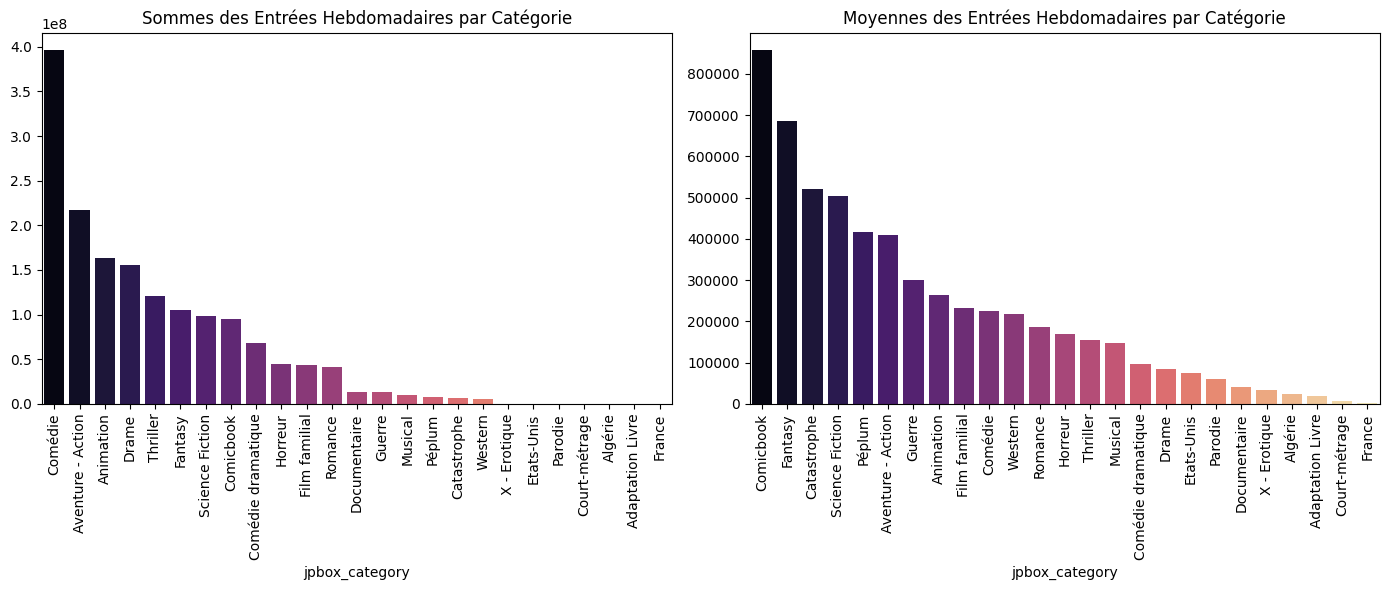

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns


df_we_sum = df_join.groupby('jpbox_category')['jpbox_weekly_entrances'].sum().sort_values(ascending=False)

df_we_mean = df_join.groupby('jpbox_category')['jpbox_weekly_entrances'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_we_sum.index, y=df_we_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par Catégorie')
axes[0].set_xticklabels(df_we_sum.index, rotation=90)


sns.barplot(x=df_we_mean.index, y=df_we_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par Catégorie')
axes[1].set_xticklabels(df_we_mean.index, rotation=90)
plt.tight_layout()
plt.show()


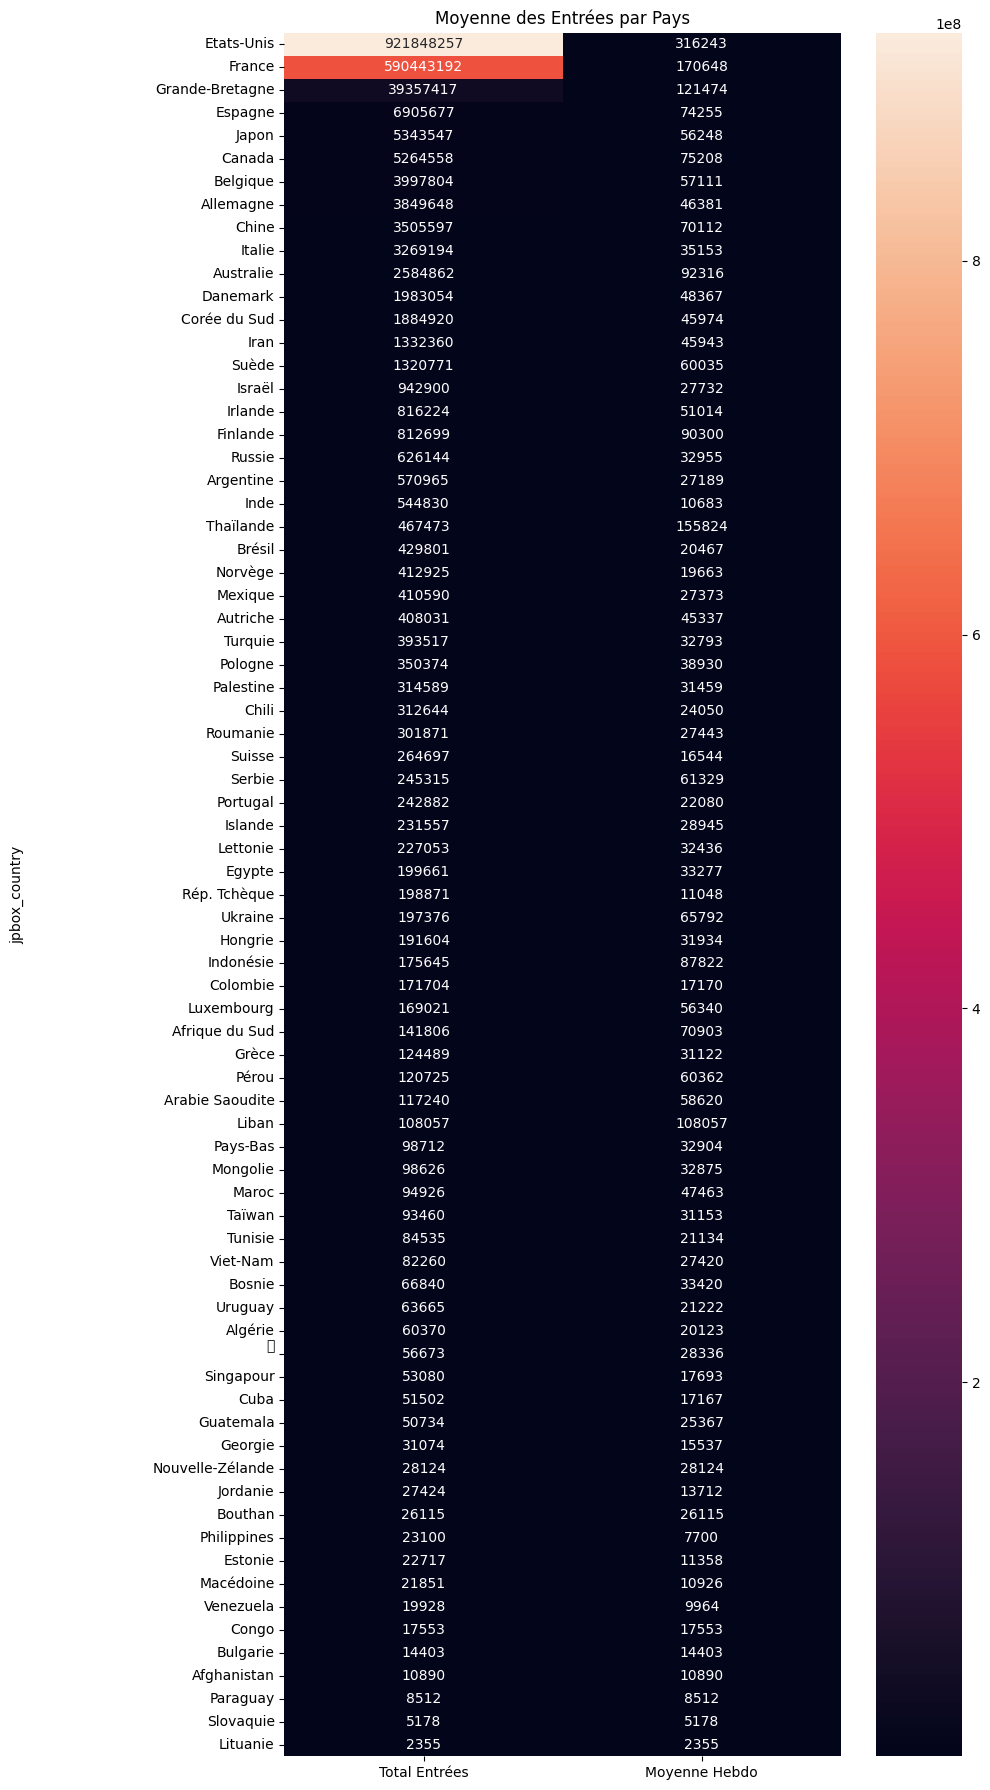

In [133]:
# un tableau est plus pertinent dans ce cas

df_we_country_sum = df_join.groupby('jpbox_country')['jpbox_weekly_entrances'].sum().sort_values(ascending=False)

df_we_country_mean = df_join.groupby('jpbox_country')['jpbox_weekly_entrances'].mean().sort_values(ascending=False)

df_country_stats = pd.concat(
    [df_we_country_sum, df_we_country_mean],
    axis=1,
    keys=['Total Entrées', 'Moyenne Hebdo']
)

plt.figure(figsize=(10, 18))
sns.heatmap(df_country_stats.sort_values('Total Entrées', ascending=False), annot=True, fmt=".0f")
plt.title('Moyenne des Entrées par Pays')
plt.tight_layout()
plt.show()

### attention la palette ne respecte pas l'échelle

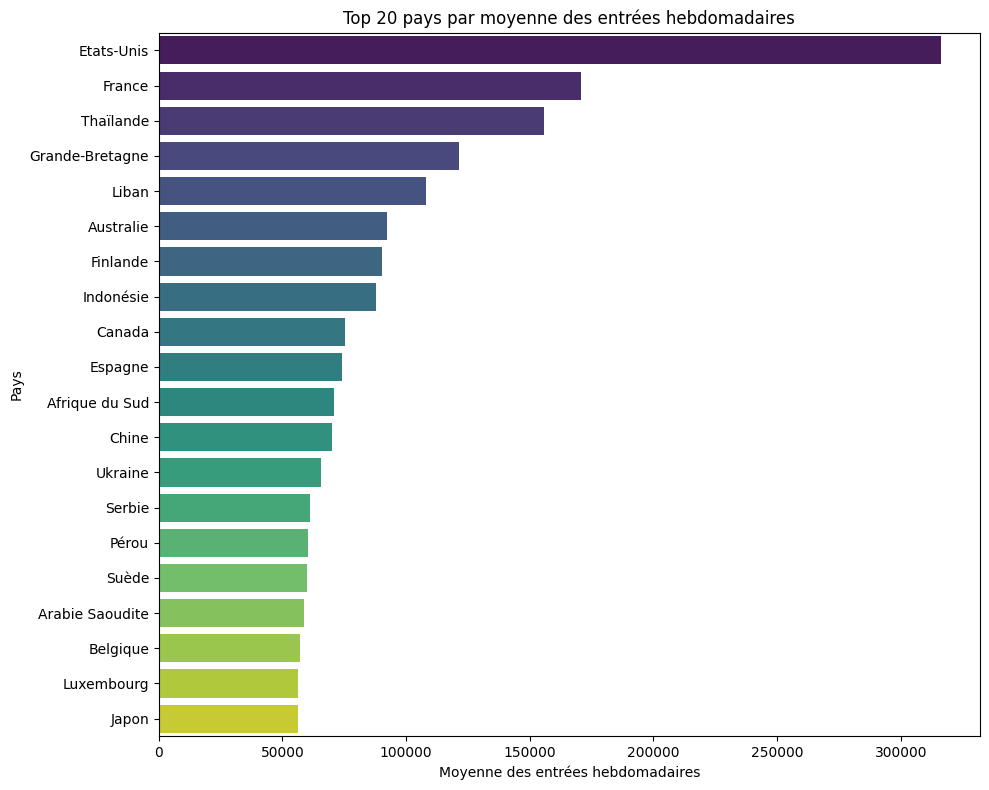

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

# On prend les 20 pays avec les meilleures moyennes
top_n = 20
df_top_mean = df_we_country_mean.head(top_n)

# Tracer un bar chart horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=df_top_mean.values, y=df_top_mean.index, palette="viridis")
plt.title(f'Top {top_n} pays par moyenne des entrées hebdomadaires')
plt.xlabel('Moyenne des entrées hebdomadaires')
plt.ylabel('Pays')
plt.tight_layout()
plt.show()


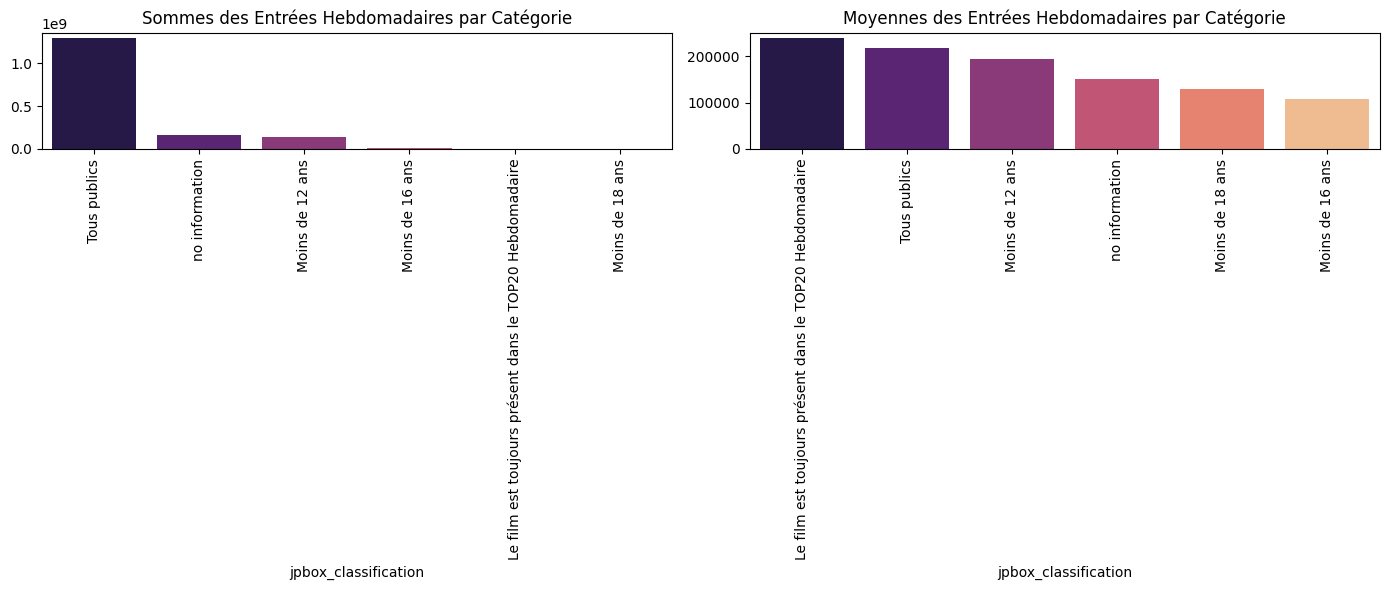

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns


df_we_classification_sum = df_join.groupby('jpbox_classification')['jpbox_weekly_entrances'].sum().sort_values(ascending=False)

df_we_classification_mean = df_join.groupby('jpbox_classification')['jpbox_weekly_entrances'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_we_classification_sum.index, y=df_we_classification_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par Catégorie')
axes[0].set_xticklabels(df_we_classification_sum.index, rotation=90)


sns.barplot(x=df_we_classification_mean.index, y=df_we_classification_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par Catégorie')
axes[1].set_xticklabels(df_we_classification_mean.index, rotation=90)
plt.tight_layout()
plt.show()

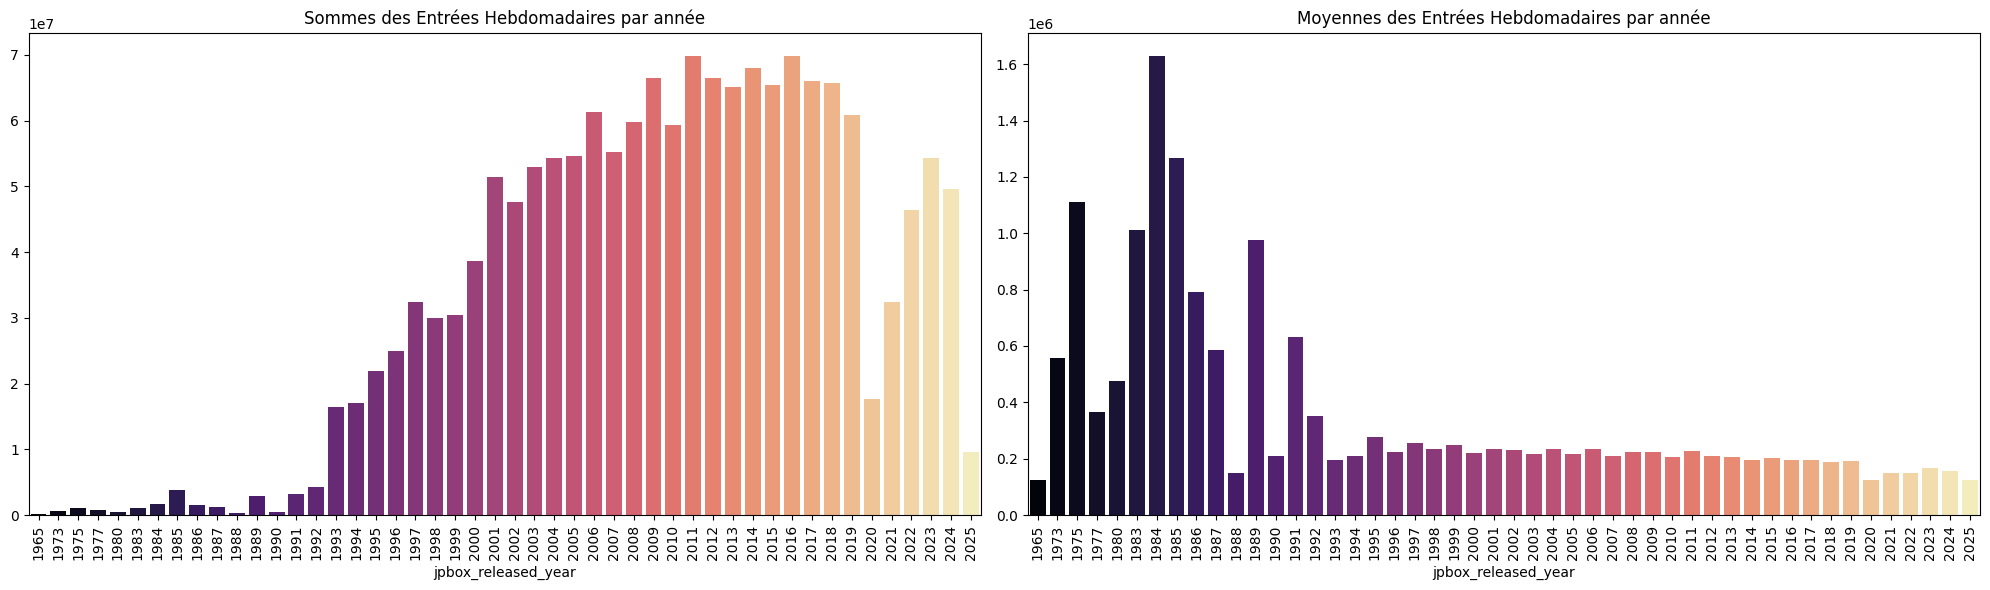

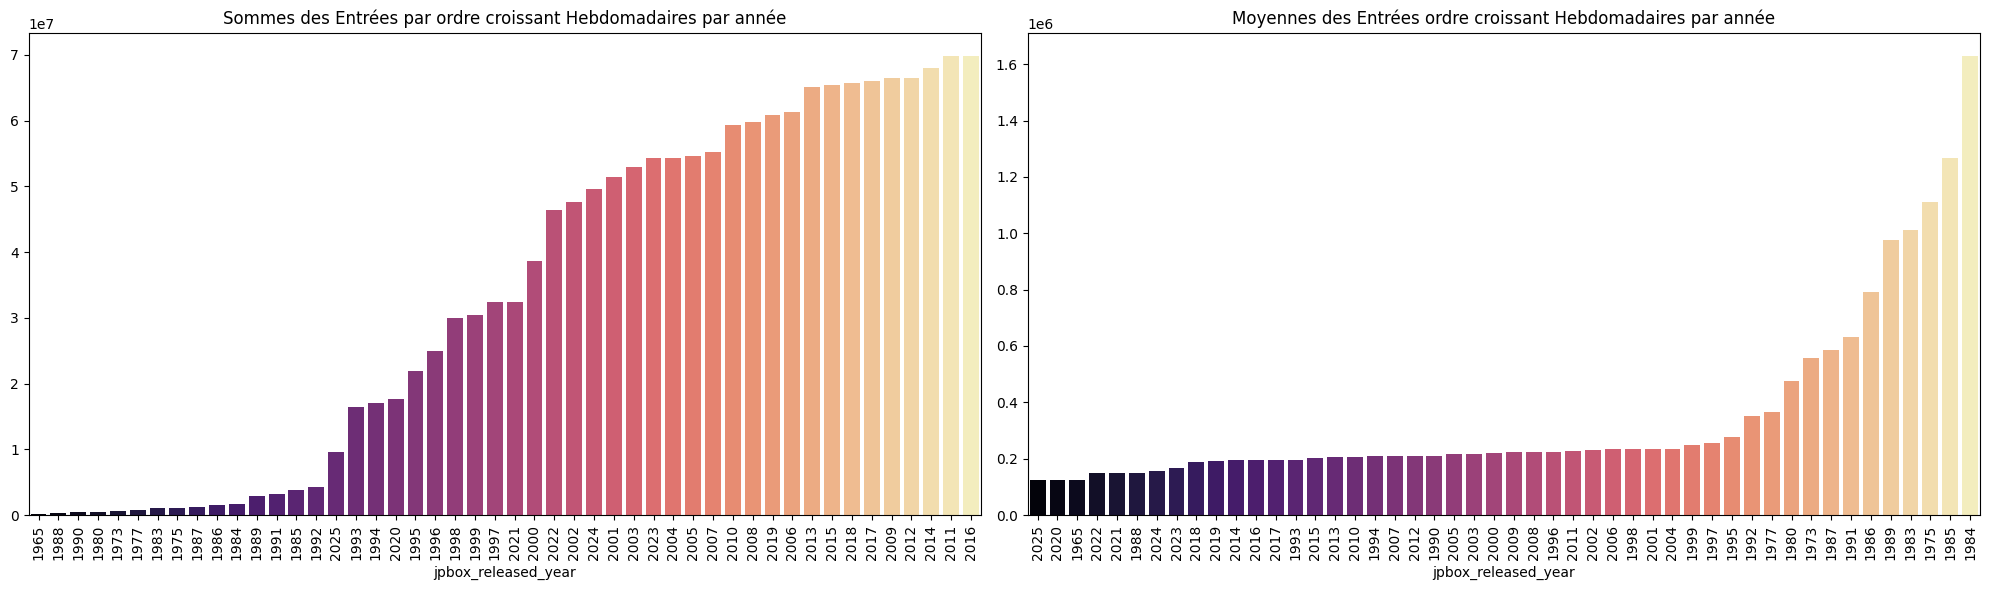

In [137]:
df_we_years_sum = df_join.groupby('jpbox_released_year')['jpbox_weekly_entrances'].sum()
df_we_years_mean = df_join.groupby('jpbox_released_year')['jpbox_weekly_entrances'].mean()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=df_we_years_sum.index, y=df_we_years_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par année')
axes[0].set_xticklabels(df_we_years_sum.index, rotation=90)


sns.barplot(x=df_we_years_mean.index, y=df_we_years_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par année')
axes[1].set_xticklabels(df_we_years_mean.index, rotation=90)
plt.tight_layout()
plt.show()

df_we_years_sum_ORDER = df_join.groupby('jpbox_released_year')['jpbox_weekly_entrances'].sum().sort_values()
df_we_years_mean_ORDER = df_join.groupby('jpbox_released_year')['jpbox_weekly_entrances'].mean().sort_values()

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=df_we_years_sum_ORDER.index, y=df_we_years_sum_ORDER.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées par ordre croissant Hebdomadaires par année')
axes[0].set_xticklabels(df_we_years_sum_ORDER.index, rotation=90)


print('='*550)

sns.barplot(x=df_we_years_mean_ORDER.index, y=df_we_years_mean_ORDER.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées ordre croissant Hebdomadaires par année')
axes[1].set_xticklabels(df_we_years_mean_ORDER.index, rotation=90)
plt.tight_layout()
plt.show()




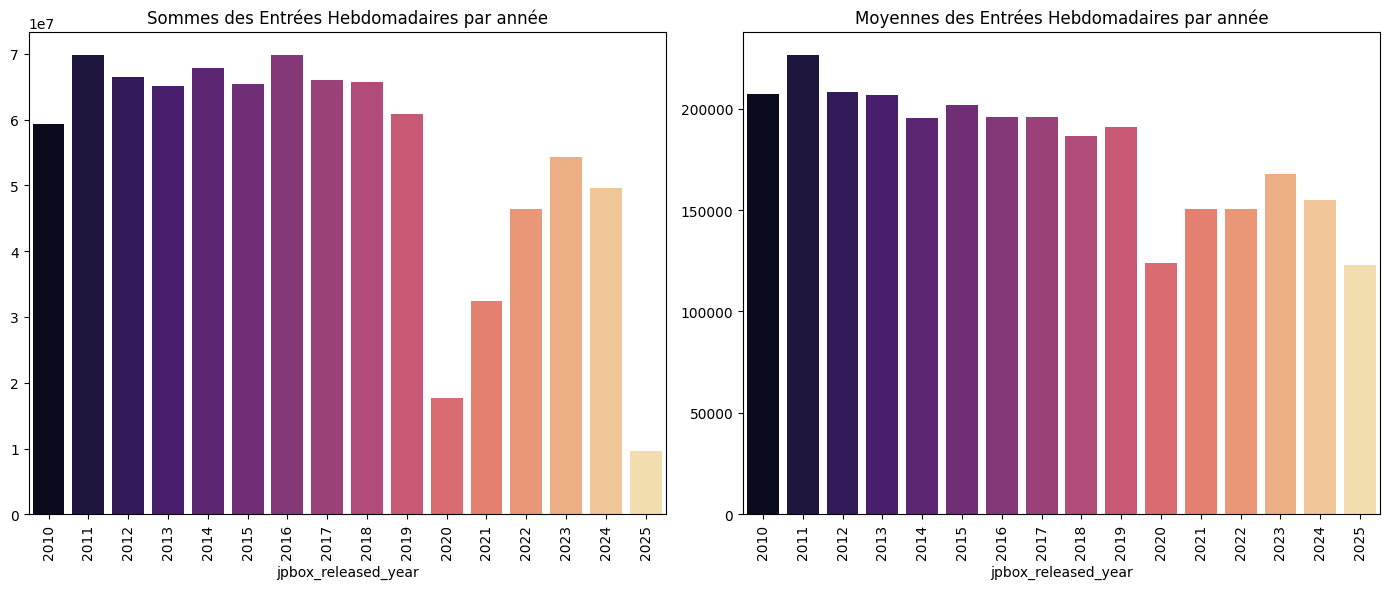

In [138]:

#AFFLUENCE PAR ANNEE À PARTIR DE 2010

df_year_2010 = df_join[['jpbox_released_year','jpbox_weekly_entrances']][pd.to_numeric(df_join['jpbox_released_year']) > 2009]
# df_year_2010

df_we_years_sum = df_year_2010.groupby('jpbox_released_year')['jpbox_weekly_entrances'].sum()
df_we_years_mean = df_year_2010.groupby('jpbox_released_year')['jpbox_weekly_entrances'].mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=df_we_years_sum.index, y=df_we_years_sum.values, palette='magma', ax=axes[0])
axes[0].set_title('Sommes des Entrées Hebdomadaires par année')
axes[0].set_xticklabels(df_we_years_sum.index, rotation=90)


sns.barplot(x=df_we_years_mean.index, y=df_we_years_mean.values, palette='magma', ax=axes[1])
axes[1].set_title('Moyennes des Entrées Hebdomadaires par année')
axes[1].set_xticklabels(df_we_years_mean.index, rotation=90)
plt.tight_layout()
plt.show()


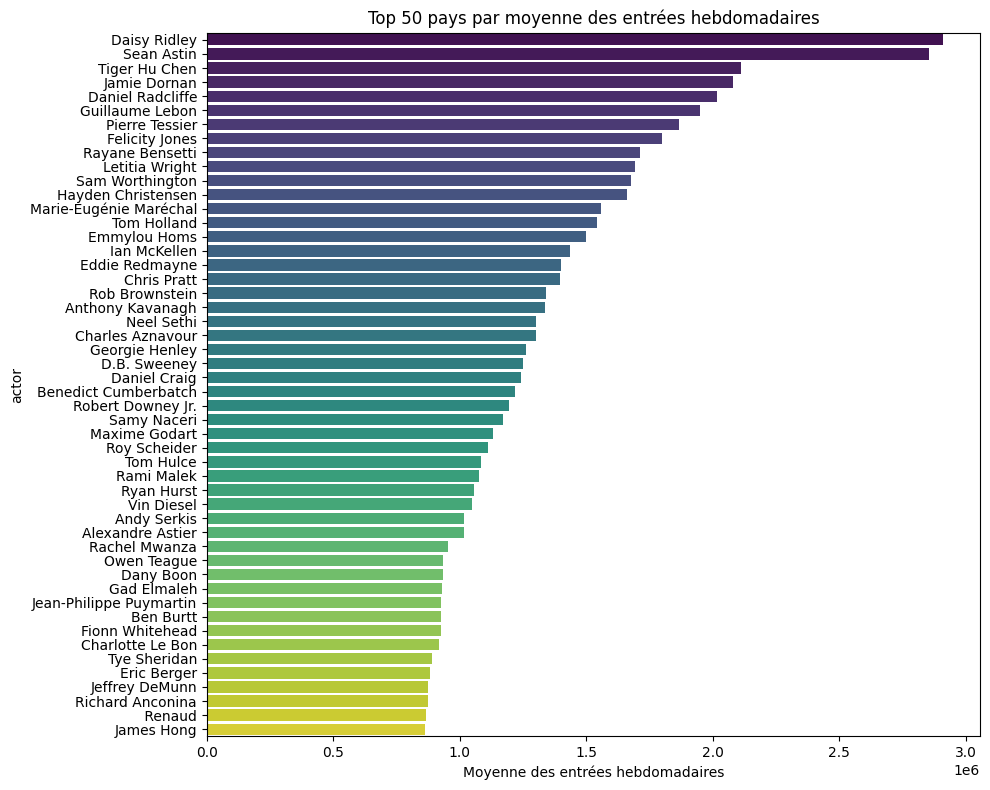

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# On prend les 20 pays avec les meilleures moyennes
top_n = 50
df_top_actor = df_join.groupby('casting_first')['jpbox_weekly_entrances'].mean().sort_values(ascending=False)

df_top_actor = df_top_actor.head(top_n)


# Tracer un bar chart horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=df_top_actor.values, y=df_top_actor.index, palette="viridis")
plt.title(f'Top {top_n} des acteurs par moyenne des entrées hebdomadaires')
plt.xlabel('Moyenne des entrées hebdomadaires')
plt.ylabel('actor')
plt.tight_layout()
plt.show()


In [167]:
df_join.columns

Index(['jpbox_fr_title', 'jpbox_released_year', 'jpbox_original_title',
       'jpbox_country', 'jpbox_category', 'jpbox_released_date',
       'jpbox_classification', 'jpbox_duration', 'jpbox_total_entrances',
       'jpbox_weekly_entrances', 'jpbox_incomes_total', 'jpbox_incomes_france',
       'jpbox_budget', 'jpbox_url_movie', 'jpbox_synopsis', 'allocine_writer',
       'allocine_director', 'allocine_casting', 'allocine_press_note',
       'allocine_box_office_week2', 'allocine_societies',
       'allocine_soundtrack', 'allocine_distribution',
       'jpbox_duration_minutes', 'casting_first', 'allocine_writer_first',
       'allocine_societies_first', 'allocine_soundtrack_first'],
      dtype='object')

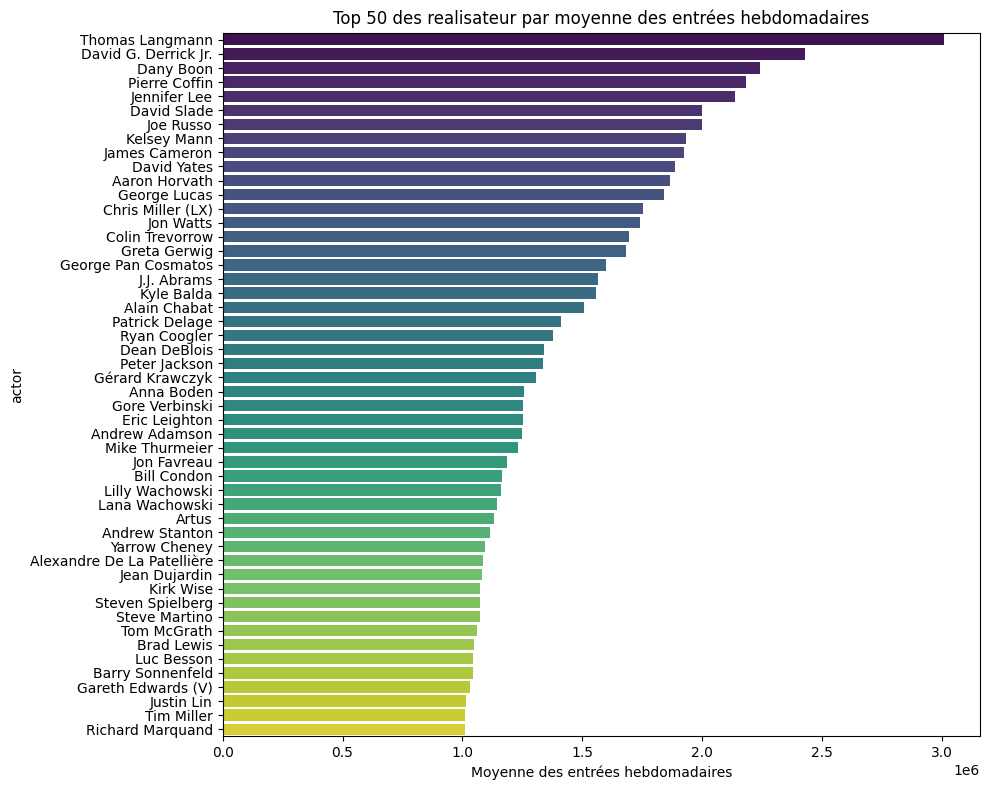

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# On prend les 20 pays avec les meilleures moyennes
top_n = 50
df_top_actor = df_join.groupby('allocine_director')['jpbox_weekly_entrances'].mean().sort_values(ascending=False)

df_top_actor = df_top_actor.head(top_n)


# Tracer un bar chart horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=df_top_actor.values, y=df_top_actor.index, palette="viridis")
plt.title(f'Top {top_n} des realisateur par moyenne des entrées hebdomadaires')
plt.xlabel('Moyenne des entrées hebdomadaires')
plt.ylabel('actor')
plt.tight_layout()
plt.show()

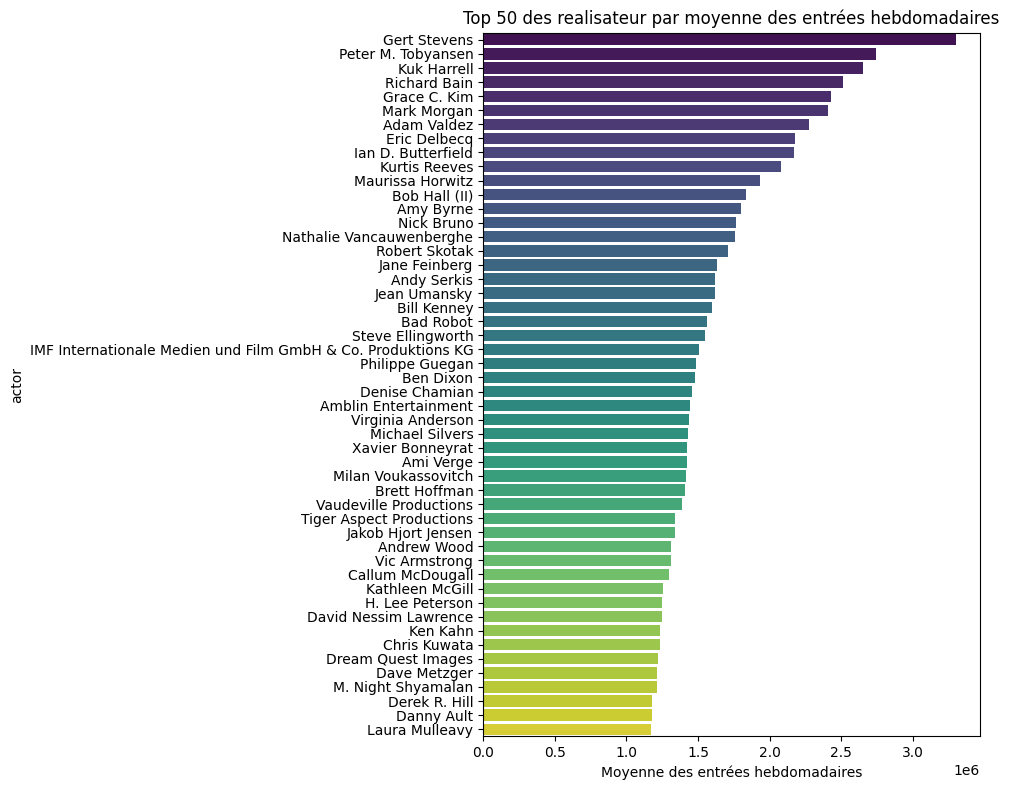

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# On prend les 20 pays avec les meilleures moyennes
top_n = 50
df_top_actor = df_join.groupby('allocine_soundtrack_first')['jpbox_weekly_entrances'].mean().sort_values(ascending=False)

df_top_actor = df_top_actor.head(top_n)


# Tracer un bar chart horizontal
plt.figure(figsize=(10, 8))
sns.barplot(x=df_top_actor.values, y=df_top_actor.index, palette="viridis")
plt.title(f'Top {top_n} des realisateur par moyenne des entrées hebdomadaires')
plt.xlabel('Moyenne des entrées hebdomadaires')
plt.ylabel('actor')
plt.tight_layout()
plt.show()